# Увеличение выручки крупного онлайн - магазина

 Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. 
 
 Нам предстоит приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты

В нашем распоряжении 3 датасета:

Файл hypothesis.csv хсодержит 9 гипотез об увеличении выручки с указанными параметрами Reach, Impact, Confidence, Effort

Файлы orders.csv и visitors.csv содержат данные о проведенном A/B тесте и его результатах

## Часть 1. Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import datetime as dt

In [2]:
pth1 = 'hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    hypothesis = pd.read_csv(pth1)
elif os.path.exists(pth2):
    hypothesis = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Мы видим 9 разных гипотез:

1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

2) Запустить собственную службу доставки, что сократит срок доставки заказов

3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

4) Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар

5) Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

6) Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

9) Запустить акцию, дающую скидку на товар в день рождения

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] /hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by = 'ICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Можно заметить, что в приоритете запуск акций, чуть ниже новые каналы трафика и форма подписки. На последнем месте - изменение цвета фона

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by= 'RICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Здесь же мы видим, что в приоритете форма подписки на страницы для базы рассылок, почти в 2 раза отстает блок рекомендаций с категориями, новые каналы трафика и баннеры с акциями (на одном месте), а на самом последнем месте по-прежнему цвет фона.

Ключевое отличие RICE от ICE скоринга заключается в том, что добавляется элемент «охвата», что меняет общую формулу вычисления.

Уровень охвата измеряется количеством людей (целевой аудитории) или событий за определённый период времени.

Влияние — показывает, какой вклад какая–либо функция или другая составляющая проекта вносит в общий продукт.

Уверенность — измеряется в процентах, которые показывают точность оценки охвата, влияния и трудозатрат.

Трудозатраты — подсчитывают затраты на рабочую силу, которая оценивается как количество человеко–часов/недель/месяцев и т.д., в зависимости от потребностей.

Из-за того, что добавили уровень охвата, который влияет на рейтинг напрямую, изменился и приоритет.

## Часть 2. Анализ A/B-теста

In [5]:
pth1 = 'orders.csv'
pth2 = '/datasets/orders.csv'

if os.path.exists(pth1):
    orders = pd.read_csv(pth1)
elif os.path.exists(pth2):
    orders = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
duplicateRows = orders[orders.duplicated (keep='last')]
duplicateRows

,transactionId,visitorId,date,revenue,group


In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
pth1 = 'visitors.csv'
pth2 = '/datasets/visitors.csv'

if os.path.exists(pth1):
    visitors = pd.read_csv(pth1)
elif os.path.exists(pth2):
    visitors = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
duplicateRows2 = visitors[visitors.duplicated (keep='last')]
duplicateRows2

,date,group,visitors


In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

У нас есть 2 датасета без пропусков и дубликатов, можно работать дальше. В первом датасете 1197 строк, собраны id заказов и пользователей, совершивших заказ, сумма, дата заказа и группа. В втором - 62 строки - дата, группа и количество пользователей в указанную дату в указанной группе A/B-теста

### Построим график кумулятивной выручки по группам

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),\
                                     axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


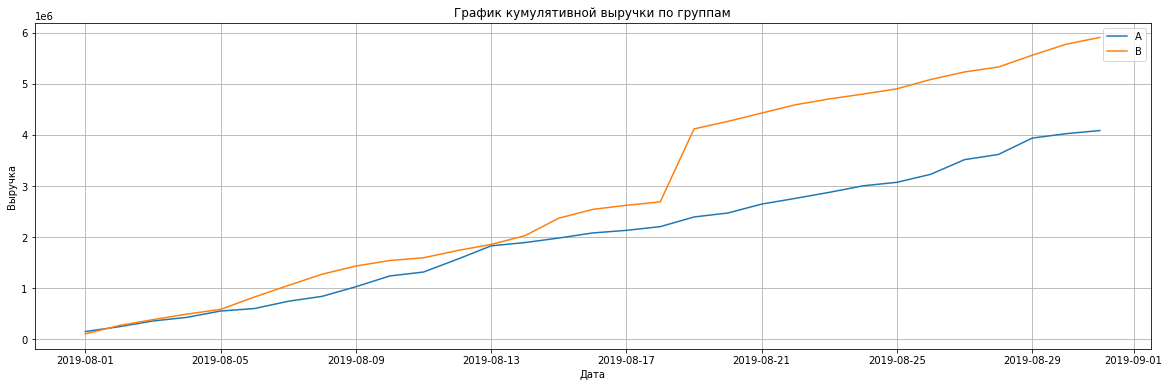

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(20,6))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

Выручка в группе А равномерно увеличивается на протяжении всего теста, в группе В в одной точке дала резкий рост и в целом выше, чем в А. Такой всплеск может говорить о резком увеличении числа заказов или о появлении очень дорогих.

### Построим график кумулятивного среднего чека по группам

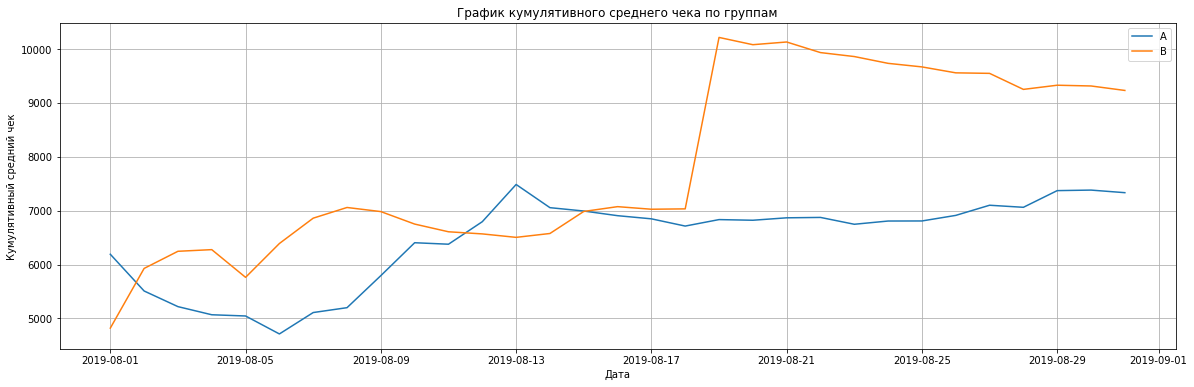

In [17]:
plt.figure(figsize=(20,6))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Средний чек стабилизируется к концу теста, у группы А показатели растут, а у В падают, но плавно. У это же группы был резкий скачок, вероятно это связано все таки с очень дорогими заказми.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

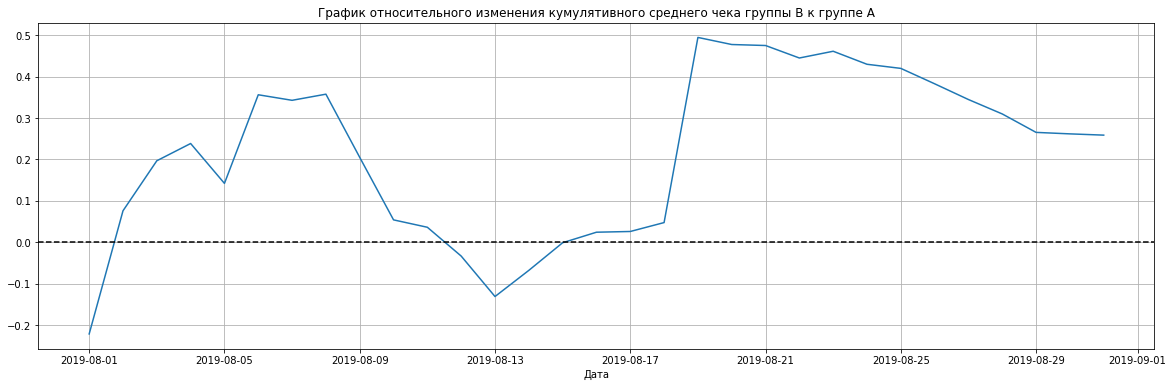

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,6))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']\
                                          )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график изменения резко скачет, значит в  данных есть аномалии и выбросы, их нужно убрать.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

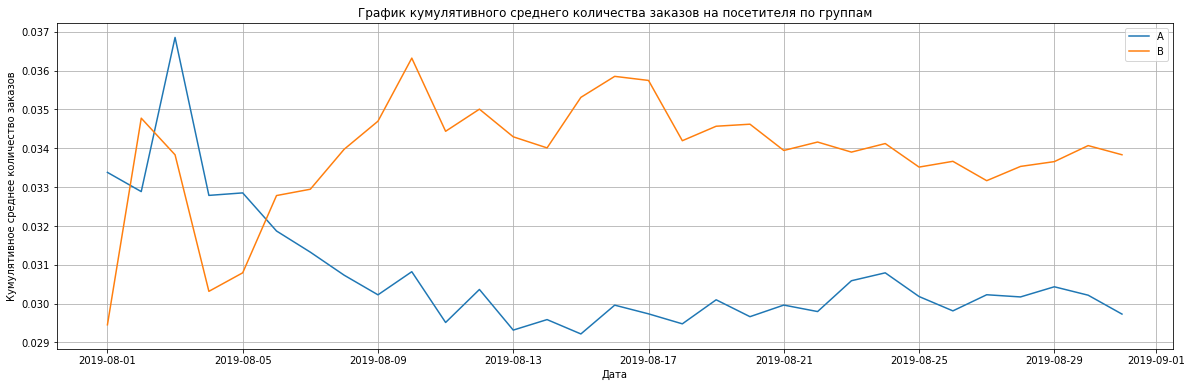

In [19]:
# датафрейм с кумулятивным количеством заказов, посетителями и кумулятивной выручкой по дням в группе А
cumulativordersA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов, посетителями и кумулятивной выручкой по дням в группе B
cumulativeordersB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(20,6))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')

plt.plot(cumulativordersA['date'], cumulativordersA['orders']/cumulativordersA['visitors'], label='A')
plt.plot(cumulativeordersB['date'], cumulativeordersB['orders']/cumulativeordersB['visitors'], label='B')
plt.legend();

Мы видим, что среднее количество заказов в группе В  выше, чем в группе А, и наблюдаем выбросы в самом начале и стабилизацию под конец

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A


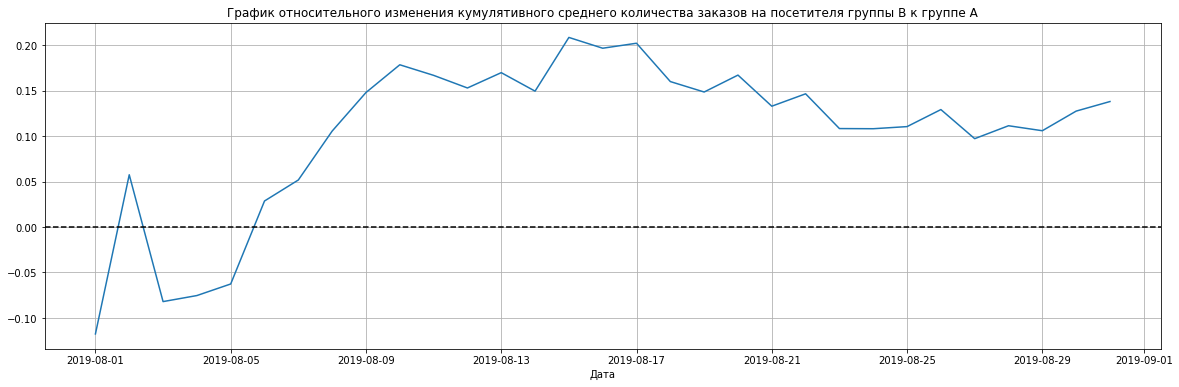

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativordersA.merge(cumulativeordersB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,6))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')

# cтроим отношение 
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB']\
                                          )/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График различия резко прыгнул в самом начале, потом так же резко упал и постепенно рос и стабилизировался. В начале теста есть явные выбросы.

### Построим точечный график количества заказов по пользователям

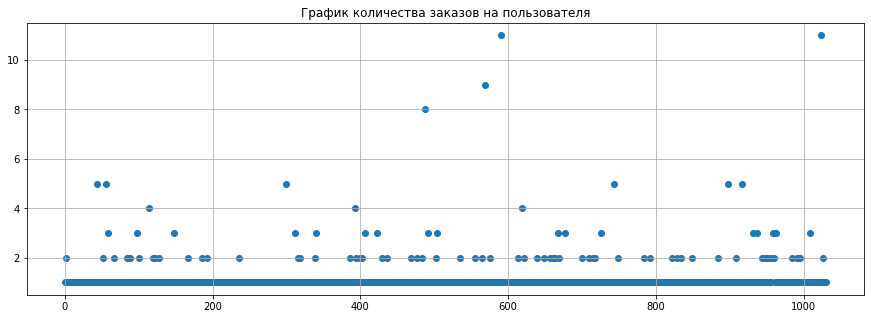

In [21]:
ordersUsers = orders.merge(visitors, left_on='date', right_on='date', how='left')
ordersByUsers = (
    ordersUsers.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов на пользователя')
plt.scatter(x_values, ordersByUsers['orders']) 


На графике видно, что много пользователей с 1-2 заказами, меньше с 3 и еще меньше с 4. Есть и рекордсмены - у них больше 8

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [22]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформили больше 2 заказов, и 10% пользователей сделали заказ не более 1 раза. Границу можно установить на 3 заказах.

### Построим точечный график стоимостей заказов

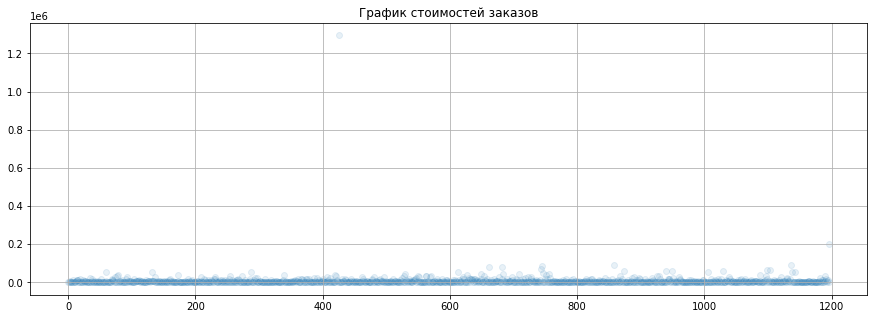

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.1);

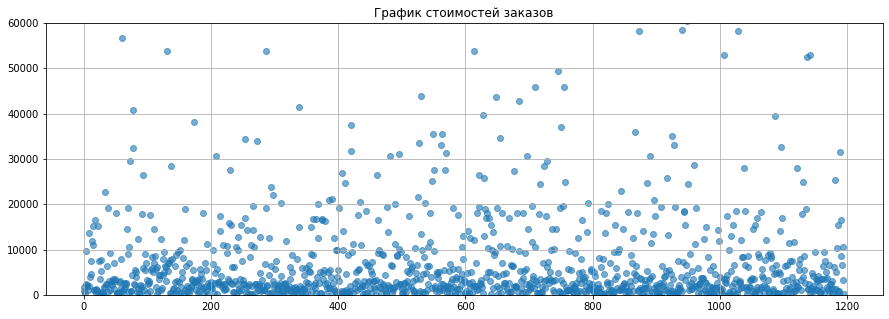

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.6)
plt.ylim((0,60000));

Пока мало что можно сказать, но есть заказ сильно выбивающийся, он как раз и дал такой скачок в графике.Основная масса до 20000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[28000.  58233.2]


Не  более 5% сделали заказы на 28000 и не более 1% - на 58233.2. Установить верхнюю границу можно на 30000

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA'] #количество пользователей в выбранную дату в группе A

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] # #количество пользователей до выбранной
                                                                #даты включительно в группе A

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] #количество пользователей в выбранную дату в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] #количество пользователей до выбранной
                                                                #даты включительно в группе B

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA'] #количество заказов в выбранную дату и 
                                                                     #суммарная выручка в выбранную дату в группе A

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA', #суммарное число заказов до выбранной даты включительно в группе A
    'revenueCummulativeA', #суммарная выручка до выбранной даты включительно в группе A
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB'] ##количество заказов в выбранную дату и 
                                                                     #суммарная выручка в выбранную дату в группе B

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',  ##суммарное число заказов до выбранной даты включительно в группе B
    'revenueCummulativeB', #суммарная выручка до выбранной даты включительно в группе B
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [28]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет,  отвергаем. Группа В лучше А на почти на 14%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B выше среднего чека группы A почти на 26%.


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Мы взяли границу в стоимости на 30000, а в количестве заказов на 2

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
68


Итого 68 аномальных посетителей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.172


Первое число — p-value = 0.013 по прежнему меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Группа В лучше А на почти на 17%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


P-value значительно снова больше 0.05, почти не изменился. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А вот по группам изменения существенные. По очищенным данным можно заметить, что группа А лучше, чем В на 2%

Итог:

Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;


### Примем решение по результатам теста и объясним его

# Приоретизация гипотез

1. В начале исследования мы приоретизировали 9 гипотез для по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Среди них при приоретизации с помощью ICE в топ вошли запуск акций, новые каналы трафика и форма подписки. На последнем месте - изменение цвета фона

2. А при приоретизации с помощью RICE - приоритете форма подписки на страницы для базы рассылок, почти в 2 раза отстает блок рекомендаций с категориями, новые каналы трафика и баннеры с акциями (на одном месте), а на самом последнем месте по-прежнему цвет фона.

3. Ключевое отличие RICE от ICE скоринга заключается в том, что добавляется элемент «охвата», что меняет общую формулу вычисления.

    Уровень охвата измеряется количеством людей (целевой аудитории) или событий за определённый период времени.

    Влияние — показывает, какой вклад какая–либо функция или другая составляющая проекта вносит в общий продукт.

    Уверенность — измеряется в процентах, которые показывают точность оценки охвата, влияния и трудозатрат.

    Трудозатраты — подсчитывают затраты на рабочую силу, которая оценивается как количество человеко–часов/недель/месяцев и т.д., в зависимости от потребностей.

    Из-за того, что добавили уровень охвата, который влияет на рейтинг напрямую, изменился и приоритет.

# А\В тест

В ходе изучения результатов А\В теста мы  построили графики, чтобы понять какая из групп по итогу лучше. Узнали, есть ли статистические значимые различия в среднем чеке и среднем количестве заказов на пользователя.

1. Мы заметили, что выручка в группе А равномерно увеличивается на протяжении всего теста, в группе В в одной точке дала резкий рост и в целом выше, чем в А. Благодаря графику мы увидели, что в данных явно есть выбросы.

2. Средний чек в целом стабилизируется к концу теста, у группы А показатели растут, а у В падают, но плавно. У этой же группы был резкий скачок

3. Среднее количество заказов в группе В  выше, чем в группе А, наблюдаем снова выбросы в самом начале и стабилизацию под конец

По итогу исследования рекомендую завершить тест - группа В по показателям  лучше группы А.

Статистически значимые различия по среднему количеству заказов между группами как по сырым, так и по очищенным данным есть.

А вот по среднему чеку - нет, даже несмотря на то, что по сырым данным группа В лучше на 26%, а по чистым на 2% лучше группа А.